In [386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import json

In [387]:
RANDOM_STATE = 19
N_INIT = 10
np.random.seed(RANDOM_STATE)

metrics_summary = {}
best_configs = {}

In [37]:
# Загрузка csv
df2 = pd.read_csv('data/S07-hw-dataset-02.csv')
df3 = pd.read_csv('data/S07-hw-dataset-03.csv')
df4 = pd.read_csv('data/S07-hw-dataset-04.csv')

In [38]:
# Минимальные сведения о датасетах
# df2
df2.head()

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


In [40]:
df2.describe()

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


По результатам анализа информации о датасете df2 можно сделать вывод, что все признаки относятся к числовым (float64).

In [42]:
# df3
df3.head()

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


In [44]:
df3.describe()

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


По результатам анализа информации о датасете df2 можно сделать вывод, что все признаки относятся к числовым (float64).

In [46]:
# df4
df4.head()

,sample_id,cat_a,cat_b,n01,n02,n03,n04,n05,n06,n07,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
0,0,B,X,-4.827501,-24.507466,-7.852963,0.771781,28.297884,-4.493911,-42.769449,...,24.597176,-26.354320,4.543397,-19.549036,-3.051332,-5.538587,-3.084457,5.499629,-6.128896,3.132067
1,1,F,V,51.302500,NaN,5.534737,51.305464,-8.027553,28.297548,NaN,...,-18.216260,8.527932,17.202115,-30.452260,0.855326,1.199066,3.597555,-2.239703,2.932710,0.473145
2,2,A,W,-4.820828,-2.625385,27.891578,1.523041,-5.776687,-16.298523,2.462937,...,-48.260775,9.313232,12.323411,55.081325,-3.945606,-0.280540,-0.130583,-7.353205,-2.942836,1.460477
3,3,B,X,-2.627573,-25.063639,-9.450011,-8.344669,22.371118,-11.525848,-43.762607,...,24.700663,-25.466915,-3.398665,-18.174541,0.438229,3.152556,3.859283,-2.678769,-2.213923,-4.724639
4,4,C,Y,-11.415710,-8.692169,48.636163,14.661826,-39.634618,10.769075,40.187536,...,-79.710383,-13.694253,41.575892,-9.498640,1.529608,-1.641347,3.500090,3.111257,1.475232,-1.321676


In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

In [48]:
df4.describe()

,sample_id,n01,n02,n03,n04,n05,n06,n07,n08,n09,...,n21,n22,n23,n24,n25,n26,n27,n28,n29,n30
count,10000.00000,9826.000000,9811.000000,9801.000000,9808.000000,9799.000000,9817.000000,9796.000000,9806.000000,9805.000000,...,9785.000000,9804.000000,9829.000000,9793.000000,9815.000000,9776.000000,9803.000000,9789.000000,9798.000000,9805.000000
mean,4999.50000,17.348435,-2.057620,7.908302,14.269157,0.900590,5.832787,-0.840875,-4.888128,3.184200,...,-12.716502,-0.506241,8.360226,0.026943,0.039297,-0.037155,0.028512,-0.030738,-0.018685,-0.030254
std,2886.89568,22.578551,19.043410,25.637807,18.815319,20.981294,13.221646,26.583849,15.466271,32.208740,...,37.290305,14.336833,17.754646,26.121335,3.009995,3.020813,3.028106,3.000090,3.014209,3.014573
min,0.00000,-22.437090,-37.546998,-38.136412,-23.374316,-45.914070,-20.650038,-60.297304,-44.464550,-70.904880,...,-89.640783,-35.102360,-25.014050,-49.423300,-11.225848,-14.446922,-10.840777,-11.679259,-11.437909,-11.491223
25%,2499.75000,-3.975438,-14.200552,-8.591513,-1.223379,-5.086756,-4.532057,-13.554720,-17.352641,-11.460490,...,-41.284671,-11.563652,-2.123576,-19.425213,-1.973213,-2.082235,-2.007628,-2.074500,-2.051778,-2.074396
50%,4999.50000,22.042807,-6.532183,0.350400,10.069142,2.413111,7.391953,-2.429024,-7.095546,13.258691,...,-1.145681,2.491416,6.691365,-8.464171,0.037806,-0.033336,0.031588,-0.043127,-0.015441,-0.015903
75%,7499.25000,37.535647,2.092197,30.725630,29.807101,18.398883,13.033076,16.095731,3.909111,20.188426,...,18.916379,11.903004,14.939690,16.861978,2.048648,2.019027,2.056870,1.980217,2.013964,2.031215
max,9999.00000,65.446912,43.326647,60.185729,65.094588,42.527554,39.933274,48.591236,31.335431,64.696045,...,49.157087,22.452135,46.892903,61.540902,11.002135,11.394631,11.936846,10.663960,10.665988,13.755203


Признаки cat_a и cat_b датасета df4 относятся к категориальным (object), остальные - к числовым (float64)

In [49]:
# Определение признаков
X2 = df2.drop(columns=['sample_id'])
sample_id2 = df2['sample_id'] # sample_id хранить отдельно (для сохранения результатов)
X3 = df3.drop(columns=['sample_id'])
sample_id3 = df3['sample_id']
X4 = df4.drop(columns=['sample_id'])
sample_id4 = df4['sample_id']

### Препроцессинг 

In [60]:
# Для df2
prep2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # хотя пропусков нет, для единообразия
    ('scaler', StandardScaler())
])
X2_processed = prep2.fit_transform(X2)

# Для df3
prep3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X3_processed = prep3.fit_transform(X3)

# Для df4 - с категориальными признаками
X4_numeric = X4.drop(columns=['cat_a', 'cat_b'])

prep4 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
X4_processed = prep4.fit_transform(X4_numeric)

Для df4 исключим категориальные признаки, поскольку большая вариативность в них значительно замедлит и затруднит обучение.

### Модели недели 7

#### dataset-02

In [195]:
# KMeans
k_range = range(2, 21)
silhouette_scores_kmeans = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=N_INIT)
    cluster_labels = kmeans.fit_predict(X2_processed)
    silhouette_avg = silhouette_score(X2_processed, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

Best k for df2: 5 with silhouette score: 0.4549


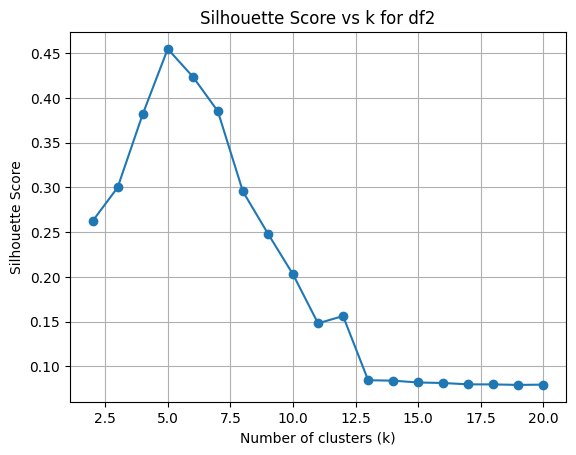

In [454]:
# Визуализация метрик KMeans
plt.plot(k_range, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k for df2')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k2.png')

# Выбор лучшего k
best_k = k_range[np.argmax(silhouette_scores_kmeans)]
print(f"Best k for df2: {best_k} with silhouette score: {max(silhouette_scores_kmeans):.4f}")

In [389]:
kmeans2 = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=N_INIT)
labels2 = kmeans2.fit_predict(X2_processed)
metrics_summary['dataset-02'] = {}
metrics_summary['dataset-02']['KMeans'] = {}
metrics_summary['dataset-02']['KMeans']['silhouette_score'] = silhouette_score(X2_processed, labels2)
metrics_summary['dataset-02']['KMeans']['davies_bouldin_score'] = davies_bouldin_score(X2_processed, labels2)
metrics_summary['dataset-02']['KMeans']['calinski_harabasz_score'] = calinski_harabasz_score(X2_processed, labels2)

In [416]:
best_configs['dataset-02'] = {}
best_configs['dataset-02']['KMeans'] = {
        'n_clusters': best_k,
        'criterion': 'silhouette_score'
    }

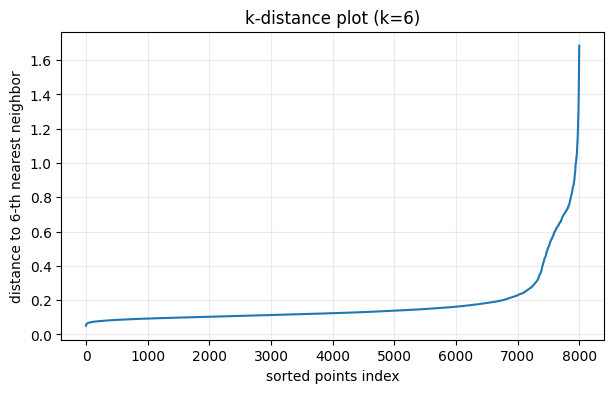

In [390]:
def k_distance_plot(X, k=8, title="k-distance plot"):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)  # distances shape: (n_samples, k)

    kth = np.sort(distances[:, -1])  # расстояние до k-го соседа
    plt.figure(figsize=(7, 4))
    plt.plot(kth)
    plt.title(f"{title} (k={k})")
    plt.xlabel("sorted points index")
    plt.ylabel(f"distance to {k}-th nearest neighbor")
    plt.grid(True, alpha=0.25)
    plt.show()

    return kth


kth = k_distance_plot(X2_processed, k=6)

В данном случае eps подбирается по точке наибольшего излома на графике. Таким образом eps = 0.30. Чтобы найти наилучший min_samples, используем подбор:

In [430]:
eps = 0.30
min_samples_list = [40, 45, 50, 55, 60, 65]

X = X2_processed

for i, ms in enumerate(min_samples_list):
    db = DBSCAN(eps=eps, min_samples=ms)
    labels = db.fit_predict(X)

    noise_mask = labels2 == -1
    cluster_mask = ~noise_mask
    n_total = len(labels2)
    n_noise = np.sum(noise_mask)
    n_clustered = np.sum(cluster_mask)
    noise_ratio = n_noise / n_total if n_total > 0 else 0

    print(f'---\neps: {eps}, ms: {ms}')
    print(silhouette_score(X2_processed[cluster_mask], labels[cluster_mask]))
    print(davies_bouldin_score(X2_processed[cluster_mask], labels[cluster_mask]))
    print(calinski_harabasz_score(X2_processed[cluster_mask], labels[cluster_mask]))

---
eps: 0.3, ms: 40
0.28858718813303
1.3406464654687265
3178.6899564304895
---
eps: 0.3, ms: 45
0.28858718813303
1.3406464654687265
3178.6899564304895
---
eps: 0.3, ms: 50
0.28858718813303
1.3406464654687265
3178.6899564304895
---
eps: 0.3, ms: 55
0.24431592176676778
3.1750458012572245
1552.3037250544069
---
eps: 0.3, ms: 60
0.22700202885184095
3.2470585106833645
1464.6520681638606
---
eps: 0.3, ms: 65
0.20777005407654306
3.246519645018811
1380.4761223269081


Видим, что один из наиболее подходящих вариантов является min_samples = 50

In [431]:
db2 = DBSCAN(eps=0.30, min_samples=50)
labels2 = db2.fit_predict(X2_processed)

metrics_summary['dataset-02']['DBSCAN'] = {}

noise_mask = labels2 == -1
cluster_mask = ~noise_mask
n_total = len(labels2)
n_noise = np.sum(noise_mask)
n_clustered = np.sum(cluster_mask)
noise_ratio = n_noise / n_total if n_total > 0 else 0

metrics_summary['dataset-02']['DBSCAN']['silhouette_score'] = silhouette_score(X2_processed[cluster_mask], labels2[cluster_mask])
metrics_summary['dataset-02']['DBSCAN']['davies_bouldin_score'] = davies_bouldin_score(X2_processed[cluster_mask], labels2[cluster_mask])
metrics_summary['dataset-02']['DBSCAN']['calinski_harabasz_score'] = calinski_harabasz_score(X2_processed[cluster_mask], labels2[cluster_mask])
metrics_summary['dataset-02']['DBSCAN']['noise_ratio'] = noise_ratio

Метрики считаются на non-noise точках

In [433]:
best_configs['dataset-02']['DBSCAN'] = {
        'eps': 0.30,
        'min_samples': 50,
        'criterion': 'silhouette_score'
    }

In [434]:
metrics_summary['dataset-02']

{'KMeans': {'silhouette_score': 0.3068599193274176,
  'davies_bouldin_score': 1.3234715790226015,
  'calinski_harabasz_score': 3573.397151201895},
 'DBSCAN': {'silhouette_score': 0.28858718813303,
  'davies_bouldin_score': 1.3406464654687265,
  'calinski_harabasz_score': 3178.6899564304895,
  'noise_ratio': np.float64(0.22025)}}

Вывод по dataset-02：

В результате сравнения метрик видим, что обе модели приблизительно равны, однако KMeans незначительно выигрывает. При этом, большое количество точек помечаются DBSCAN как шум. Пропуски на данном датасете остутсвуют, что значительно облегчает задачу кластеризации. Разница между диапазонами чисел в признаках была незначительной, однако масштабирование проводилось, чтобы не ухудшить качество модели. Категориальные признаки отсутсвуют в датасете и не требуют дополнительной обработки.

#### dataset-03

In [396]:
# KMeans
k_range = range(2, 21)
silhouette_scores_kmeans = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X3_processed)
    silhouette_avg = silhouette_score(X3_processed, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

Best k for df3: 5 with silhouette score: 0.4549


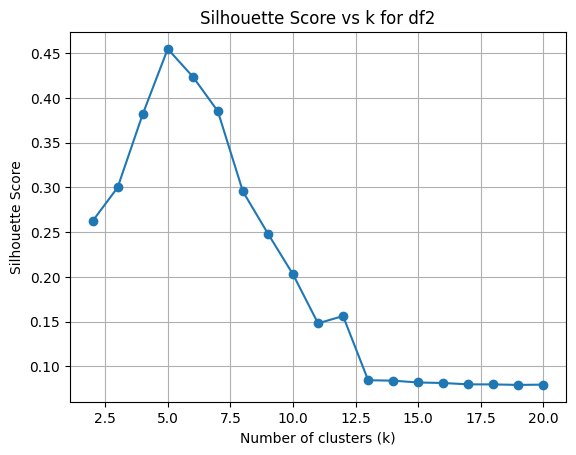

In [453]:
# Визуализация метрик KMeans
plt.plot(k_range, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k for df2')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k3.png')

# Выбор лучшего k
best_k = k_range[np.argmax(silhouette_scores_kmeans)]
print(f"Best k for df3: {best_k} with silhouette score: {max(silhouette_scores_kmeans):.4f}")

In [435]:
kmeans3 = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init="auto")
labels3 = kmeans3.fit_predict(X3_processed)
metrics_summary['dataset-03'] = {}
metrics_summary['dataset-03']['KMeans'] = {}
metrics_summary['dataset-03']['KMeans']['silhouette_score'] = silhouette_score(X3_processed, labels3)
metrics_summary['dataset-03']['KMeans']['davies_bouldin_score'] = davies_bouldin_score(X3_processed, labels3)
metrics_summary['dataset-03']['KMeans']['calinski_harabasz_score'] = calinski_harabasz_score(X3_processed, labels3)

In [436]:
best_configs['dataset-03'] = {}
best_configs['dataset-03']['KMeans'] = {
        'n_clusters': best_k,
        'criterion': 'silhouette_score'
    }

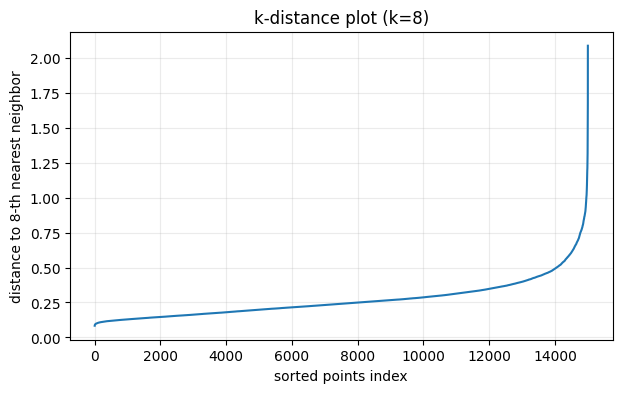

In [399]:
kth = k_distance_plot(X3_processed, k=8)

В данном случае min_samples подбирается как 2 * размерность данных, а eps - по точке наибольшего излома на графике. Таким образом, min_saples = 8, eps = 0.50

In [437]:
db3 = DBSCAN(eps=0.50, min_samples=8)
labels3 = db3.fit_predict(X3_processed)

metrics_summary['dataset-03']['DBSCAN'] = {}

noise_mask = labels3 == -1
cluster_mask = ~noise_mask
n_total = len(labels3)
n_noise = np.sum(noise_mask)
n_clustered = np.sum(cluster_mask)
noise_ratio = n_noise / n_total if n_total > 0 else 0

metrics_summary['dataset-03']['DBSCAN']['silhouette_score'] = silhouette_score(X3_processed[cluster_mask], labels3[cluster_mask])
metrics_summary['dataset-03']['DBSCAN']['davies_bouldin_score'] = davies_bouldin_score(X3_processed[cluster_mask], labels3[cluster_mask])
metrics_summary['dataset-03']['DBSCAN']['calinski_harabasz_score'] = calinski_harabasz_score(X3_processed[cluster_mask], labels3[cluster_mask])
metrics_summary['dataset-03']['DBSCAN']['noise_ratio'] = noise_ratio

Метрики считаются на non-noise точках

In [438]:
best_configs['dataset-03']['DBSCAN'] = {
        'eps': 0.50,
        'min_samples': 8,
        'criterion': 'silhouette_score'
    }

In [439]:
metrics_summary['dataset-03']

{'KMeans': {'silhouette_score': 0.28171083465950286,
  'davies_bouldin_score': 1.2918988354260355,
  'calinski_harabasz_score': 5922.387285284038},
 'DBSCAN': {'silhouette_score': 0.14204251708734708,
  'davies_bouldin_score': 1.3950553664183072,
  'calinski_harabasz_score': 1641.8933585397035,
  'noise_ratio': np.float64(0.029333333333333333)}}

Вывод по dataset-03：

В результате сравнения метрик видим, что KMeans выигрывает у DBSCAN в числах. При этом, небольшое количество точек помечаются DBSCAN как шум. Пропуски на данном датасете остутсвуют, что значительно облегчает задачу кластеризации. Значительных различий в диапазонах значений признаков не обнаружено, но масштабирование все равно требовалось провести, чтобы не допустить ухудшения качества модели. Категориальные признаки отсутсвуют в датасете и не требуют дополнительной обработки.

#### dataset-04

In [402]:
# KMeans
k_range = range(2, 21)
silhouette_scores_kmeans = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X4_processed)
    silhouette_avg = silhouette_score(X4_processed, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

Best k for df4: 5 with silhouette score: 0.4549


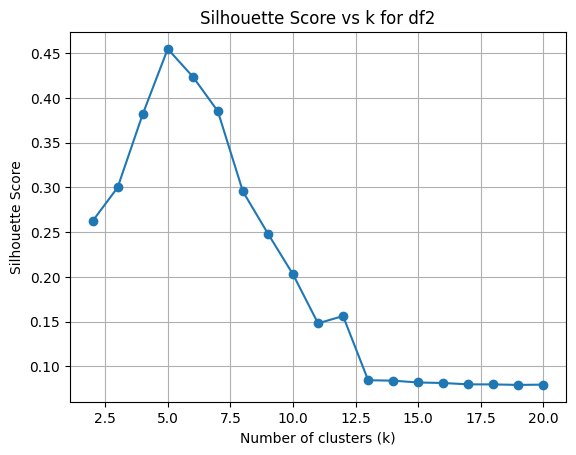

In [452]:
# Визуализация метрик KMeans
plt.plot(k_range, silhouette_scores_kmeans, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k for df2')
plt.grid(True)
plt.savefig('artifacts/figures/silhouette_vs_k4.png')

# Выбор лучшего k
best_k = k_range[np.argmax(silhouette_scores_kmeans)]
print(f"Best k for df4: {best_k} with silhouette score: {max(silhouette_scores_kmeans):.4f}")

In [440]:
kmeans4 = KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init="auto")
labels4 = kmeans4.fit_predict(X4_processed)
metrics_summary['dataset-04'] = {}
metrics_summary['dataset-04']['KMeans'] = {}
metrics_summary['dataset-04']['KMeans']['silhouette_score'] = silhouette_score(X4_processed, labels4)
metrics_summary['dataset-04']['KMeans']['davies_bouldin_score'] = davies_bouldin_score(X4_processed, labels4)
metrics_summary['dataset-04']['KMeans']['calinski_harabasz_score'] = calinski_harabasz_score(X4_processed, labels4)

In [441]:
best_configs['dataset-04'] = {}
best_configs['dataset-04']['KMeans'] = {
        'n_clusters': best_k,
        'criterion': 'silhouette_score'
    }

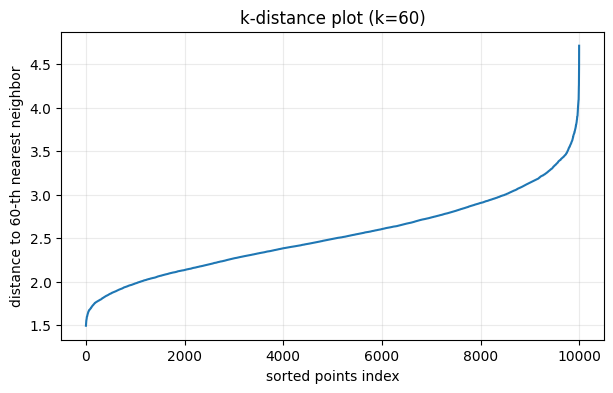

In [405]:
kth = k_distance_plot(X4_processed, k=60)

В данном случае min_samples подбирается как 2 * размерность данных, а eps - по точке наибольшего излома на графике. Таким образом, min_saples = 60 (отказались от категориальных признаков), eps = 3.5

In [458]:
db4 = DBSCAN(eps=3.50, min_samples=60)
labels4 = db4.fit_predict(X4_processed)

metrics_summary['dataset-04']['DBSCAN'] = {}

noise_mask = labels4 == -1
cluster_mask = ~noise_mask
n_total = len(labels4)
n_noise = np.sum(noise_mask)
n_clustered = np.sum(cluster_mask)
noise_ratio = n_noise / n_total if n_total > 0 else 0

metrics_summary['dataset-04']['DBSCAN']['silhouette_score'] = silhouette_score(X4_processed[cluster_mask], labels4[cluster_mask])
metrics_summary['dataset-04']['DBSCAN']['davies_bouldin_score'] = davies_bouldin_score(X4_processed[cluster_mask], labels4[cluster_mask])
metrics_summary['dataset-04']['DBSCAN']['calinski_harabasz_score'] = calinski_harabasz_score(X4_processed[cluster_mask], labels4[cluster_mask])
metrics_summary['dataset-04']['DBSCAN']['noise_ratio'] = noise_ratio

In [459]:
best_configs['dataset-04']['DBSCAN'] = {
        'eps': 3.50,
        'min_samples': 60,
        'criterion': 'silhouette_score'
    }

In [460]:
metrics_summary['dataset-04']

{'KMeans': {'silhouette_score': 0.40300781718134965,
  'davies_bouldin_score': 1.1227569719880979,
  'calinski_harabasz_score': 4656.2039411569585},
 'DBSCAN': {'silhouette_score': 0.4548642894346598,
  'davies_bouldin_score': 0.9523106734585932,
  'calinski_harabasz_score': 5323.500116564788,
  'noise_ratio': np.float64(0.0)}}

Вывод по dataset-04：

В результате сравнения метрик видим, что DBSCAN незначительно выигрывает у KMeans. Также DBSCAN не помечает точки, как шум - облегчает задачу. В данном датасете присутвовали два категориальных признака cat_a и cat_b, которые требовали дополнительной обработки. В результате было принято решение отбловить эти признаки, так как они имели слишком большой диапазон значений и затруднили бы процесс обучения. Также в датасете присутсвует орпеделённый процент пропусков, что требовало дополнительной обработки с помощью SimpleImputer.

### Визуализация 

На основе числовых метрик для dataset-02 больше подходит модель KMeans

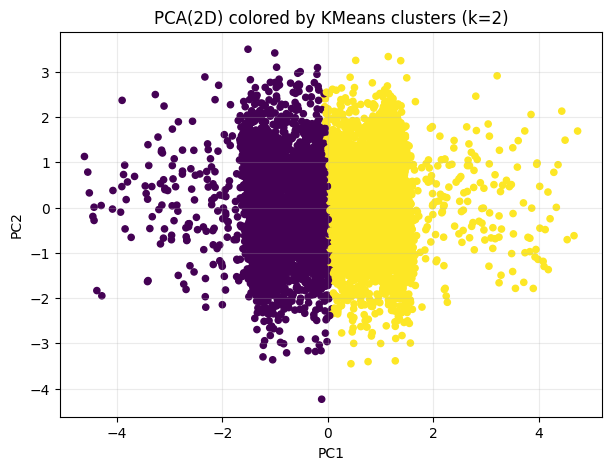

In [455]:
kmeans2 = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=N_INIT)
labels2 = kmeans2.fit_predict(X2_processed)
pca2 = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca2 = pca2.fit_transform(X2_processed)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=labels2, s=20)
plt.title("PCA(2D) colored by KMeans clusters (k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/PCA02.png')


На основе числовых метрик для dataset-03 больше подходит модель KMeans

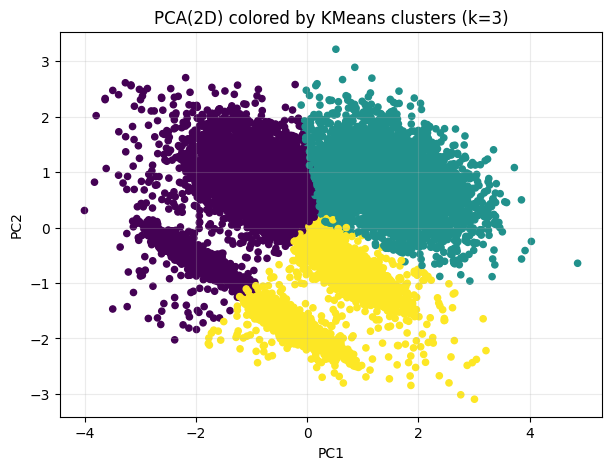

In [456]:
kmeans3 = KMeans(n_clusters=3, random_state=RANDOM_STATE, n_init=N_INIT)
labels3 = kmeans3.fit_predict(X3_processed)
pca3 = PCA(n_components=3, random_state=RANDOM_STATE)
X_pca3 = pca3.fit_transform(X3_processed)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca3[:, 0], X_pca3[:, 1], c=labels3, s=20)
plt.title("PCA(2D) colored by KMeans clusters (k=3)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/PCA03.png')


На основе числовых метрик для dataset-04 больше подходит модель DBSCAN

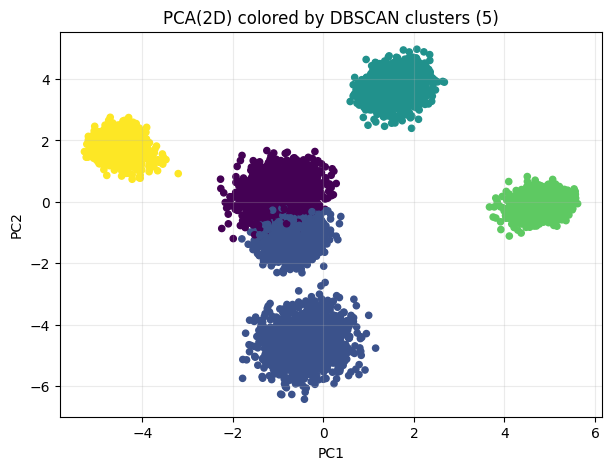

In [461]:
pca4 = PCA(n_components=5, random_state=RANDOM_STATE)
X_pca4 = pca4.fit_transform(X4_processed)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca4[:, 0], X_pca4[:, 1], c=labels4, s=20)
plt.title("PCA(2D) colored by DBSCAN clusters (5)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, alpha=0.25)
plt.savefig('artifacts/figures/PCA04.png')

### Устойчивость 

Для dataset-03 произведем проверку устойчивости:

In [462]:
random_states = [2, 18, 20, 35, 42]

# Храним результаты каждого запуска
all_labels = []
all_scores = {
    'silhouette': [],
    'davies_bouldin': [],
    'calinski_harabasz': []
}

print(f"Random states: {random_states}")

for i, random_state in enumerate(random_states):

    kmeans3_test = KMeans(n_clusters=2, random_state=random_state, n_init=N_INIT)
    labels = kmeans3_test.fit_predict(X3_processed)
    all_labels.append(labels)
    
    # Вычисление метрик
    silhouette = silhouette_score(X3_processed, labels)
    davies_bouldin = davies_bouldin_score(X3_processed, labels)
    calinski_harabasz = calinski_harabasz_score(X3_processed, labels)
    
    # Сохраняем метрики
    all_scores['silhouette'].append(silhouette)
    all_scores['davies_bouldin'].append(davies_bouldin)
    all_scores['calinski_harabasz'].append(calinski_harabasz)
    print('---')
    print(f"Silhouette: {silhouette:.4f}")
    print(f"Davies-Bouldin: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz: {calinski_harabasz:.4f}")

Random states: [2, 18, 20, 35, 42]
---
Silhouette: 0.2989
Davies-Bouldin: 1.3555
Calinski-Harabasz: 7004.7921
---
Silhouette: 0.2990
Davies-Bouldin: 1.3554
Calinski-Harabasz: 7004.7809
---
Silhouette: 0.2990
Davies-Bouldin: 1.3551
Calinski-Harabasz: 7004.7760
---
Silhouette: 0.2989
Davies-Bouldin: 1.3556
Calinski-Harabasz: 7004.7843
---
Silhouette: 0.2989
Davies-Bouldin: 1.3555
Calinski-Harabasz: 7004.7956


In [463]:
ari_matrix = np.zeros((len(random_states), len(random_states)))
ari_values = []

for i in range(len(random_states)):
    for j in range(i+1, len(random_states)):
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        ari_matrix[i, j] = ari
        ari_matrix[j, i] = ari
        ari_values.append(ari)

# Статистика по ARI
ari_mean = np.mean(ari_values)
ari_std = np.std(ari_values)
ari_min = np.min(ari_values)
ari_max = np.max(ari_values)

print(f"\nСтатистика ARI:")
print(f"  Среднее: {ari_mean:.4f}")
print(f"  Стандартное отклонение: {ari_std:.4f}")
print(f"  Минимум: {ari_min:.4f}")
print(f"  Максимум: {ari_max:.4f}")


Статистика ARI:
  Среднее: 0.9979
  Стандартное отклонение: 0.0008
  Минимум: 0.9965
  Максимум: 0.9992


Поскольку ARI > 0.9, можно сделать вывод, что модель обладает высокой устойчивостью.

### Загрузка артефактов

In [464]:
with open('artifacts/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=4)

with open('artifacts/best_configs.json', 'w') as f:
    json.dump(best_configs, f, indent=4)

In [465]:
# CSV-файлы с присвоенными кластерами для лучшего решения на каждом датасете
df2_fin = pd.DataFrame({'sample_id': sample_id2, 'cluster_label': labels2})
df3_fin = pd.DataFrame({'sample_id': sample_id3, 'cluster_label': labels3})
df4_fin = pd.DataFrame({'sample_id': sample_id4, 'cluster_label': labels4})

df2_fin.to_csv('artifacts/labels/labels_hw07_ds2.csv', index=False)
df3_fin.to_csv('artifacts/labels/labels_hw07_ds3.csv', index=False)
df4_fin.to_csv('artifacts/labels/labels_hw07_ds4.csv', index=False)